In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import torch

a = torch.randn(1, 3, 224, 224).cuda()

```
环境变量设置 -> 实际运行的卡编号
0 -> 1
1 -> 2
2 -> 3
3 -> 4
4 -> 5
5 -> 7
6 -> 8
7 -> 9
8 -> 0
9 -> 6
```

In [5]:
import os
import json
from collections import defaultdict
import hashlib

## deduplicate data

In [6]:
all_dirs = []
for root, dirs, files in os.walk('rmrb_data'):
    all_dirs.append(root)
all_dirs.sort()

In [8]:
data = defaultdict(list)
article_pool = {}
short_article_info = defaultdict(list)
processed_data = []
for root in all_dirs:
    files = os.listdir(root)
    for file in files:
        if os.path.isfile(os.path.join(root, file)) and file.endswith(".txt"):
            file_content = None
            with open(os.path.join(root, file), "r") as f:
                file_content = f.read().strip()

            if len(file_content) < 300:
                short_article_info[len(file_content)].append(file_content)
                # continue

            # 1. 去重过短的内容
            if len(file_content) <= 20:
                continue

            # 2. 去除重复的部分
            file_path = os.path.join(root, file)
            if file_content not in article_pool:
                article_pool[file_content] = file_path
            else:
                # print(f"Duplicate found: {file_path}: {article_pool[file_content]}")
                continue

            date = file.split("-")[0]
            data[date].append(file_content)
            processed_data.append(
                {"date": date, "content": file_content, "file_path": file_path}
            )
print(len(processed_data))

72321


In [116]:
with open('rmrb_data_deduplicate.jsonl', 'w') as f:
    for item in processed_data:
        f.write(json.dumps(item, ensure_ascii=False) + '\n')

In [32]:
short_article_info[90]

['图片报道\n\n\u3000\u30002月12日晚，北京冬奥会花样滑冰冰舞韵律舞比赛进行，中国队冰舞组合王诗玥/柳鑫宇（右）得到73.41分、排名第十二位，晋级自由舞阶段。\xa0\n\u3000\u3000本报记者\xa0\xa0李\xa0\xa0舸摄',
 '图片报道\n\n\u3000\u3000由于奥密克戎毒株持续传播，韩国二月二十二日新增新冠肺炎确诊病例逾十七万例，较一周前几乎翻番，再次创日增病例数新高。图为人们在首尔接受新冠病毒核酸检测。\n\u3000\u3000新华社发',
 '图片报道\n\n\u3000\u30003月14日，浙江永康东站，大型吊机正将满载着健身器材、保温杯、电动工具等货物的集装箱装上海铁联运班列。这些货物运往宁波舟山港后，将通过海运出口至国外。\n\u3000\u3000影像中国',
 '乐享春光\n\n\u3000\u30003月19日，在四川省眉山市仁寿县方家镇曲江社区的樱花园里，小朋友们在开心地玩耍。春天来临，人们在温暖和煦的春风中踏青、赏花，乐享春日美景。\n\u3000\u3000潘建勇摄（新华社发）',
 '图片报道\n\n\u3000\u3000欧洲媒体近日报道，德国计划到2035年，用可再生能源满足所有发电需求。目前，德国天然气发电占比约为16%。图为3月18日在德国林根拍摄的天然气发电站。\n\u3000\u3000新华社发',
 '春日农事忙\n\n\u3000\u3000贵州省黔东南苗族侗族自治州丹寨县各村寨，日前进入春耕春种大忙季，村民抢抓农时在田间劳作。图为3月21日，龙泉镇南街村村民在进行田间管护。\n\u3000\u3000黄晓海摄（影像中国）',
 '图片报道\n\n\u3000\u3000清明之际，国网宁夏电力青年员工在银川市烈士陵园开展清明祭英烈主题团日活动，通过缅怀先烈、聆听英雄事迹，引导大家坚定理想信念，发扬革命精神。\n\u3000\u3000袁宏彦摄（影像中国）',
 '一版责编：李仕权  刘  念  许  诺    二版责编：王  军  蒋雪婕  郭雪岩    三版责编：李  琰  杨  迅  任皓宇    四版责编：胡安琪  陈亚楠  郭  玥',
 '图片报道\n\n\u3000\u3000近日，四川省首个5G智慧港口宜宾市宜宾港集装箱码头一派繁忙，货轮有序装卸货物。今年一

In [97]:
import pandas as pd

len_counter = defaultdict(list)
for k, v in data.items():
    for article in v:
        len_counter[len(article)].append(
            {'date': k,
            'content': article}
        )

In [6]:
len_counter[11]

NameError: name 'len_counter' is not defined

In [101]:
len_counter[27412]

[{'date': '20240105',
  'content': '中华人民共和国专利法实施细则\n（2001年6月15日中华人民共和国国务院令第306号公布  根据2002年12月28日《国务院关于修改〈中华人民共和国专利法实施细则〉的决定》第一次修订  根据2010年1月9日《国务院关于修改〈中华人民共和国专利法实施细则〉的决定》第二次修订  根据2023年12月11日《国务院关于修改〈中华人民共和国专利法实施细则〉的决定》第三次修订）\n\u3000\u3000第一章\xa0\xa0总\xa0\xa0则\n\u3000\u3000第一条\xa0\xa0根据《中华人民共和国专利法》（以下简称专利法），制定本细则。\n\u3000\u3000第二条\xa0\xa0专利法和本细则规定的各种手续，应当以书面形式或者国务院专利行政部门规定的其他形式办理。以电子数据交换等方式能够有形地表现所载内容，并可以随时调取查用的数据电文（以下统称电子形式），视为书面形式。\n\u3000\u3000第三条\xa0\xa0依照专利法和本细则规定提交的各种文件应当使用中文；国家有统一规定的科技术语的，应当采用规范词；外国人名、地名和科技术语没有统一中文译文的，应当注明原文。\n\u3000\u3000依照专利法和本细则规定提交的各种证件和证明文件是外文的，国务院专利行政部门认为必要时，可以要求当事人在指定期限内附送中文译文；期满未附送的，视为未提交该证件和证明文件。\n\u3000\u3000第四条\xa0\xa0向国务院专利行政部门邮寄的各种文件，以寄出的邮戳日为递交日；邮戳日不清晰的，除当事人能够提出证明外，以国务院专利行政部门收到日为递交日。\n\u3000\u3000以电子形式向国务院专利行政部门提交各种文件的，以进入国务院专利行政部门指定的特定电子系统的日期为递交日。\n\u3000\u3000国务院专利行政部门的各种文件，可以通过电子形式、邮寄、直接送交或者其他方式送达当事人。当事人委托专利代理机构的，文件送交专利代理机构；未委托专利代理机构的，文件送交请求书中指明的联系人。\n\u3000\u3000国务院专利行政部门邮寄的各种文件，自文件发出之日起满15日，推定为当事人收到文件之日。当事人提供证据能够证明实际收到文件的日期的，以实际收到日为准。\n\u3000\u3

In [100]:
sorted(list(len_counter.keys()))[-30:]

[20742,
 20835,
 20877,
 21243,
 21518,
 21521,
 22222,
 22408,
 22443,
 22514,
 22629,
 23085,
 23760,
 24318,
 25417,
 25784,
 26641,
 27412,
 27597,
 29146,
 32846,
 33094,
 34443,
 35137,
 35708,
 36698,
 37609,
 39651,
 46570,
 55903]

<Axes: title={'center': 'Article Length Distribution'}, ylabel='Frequency'>

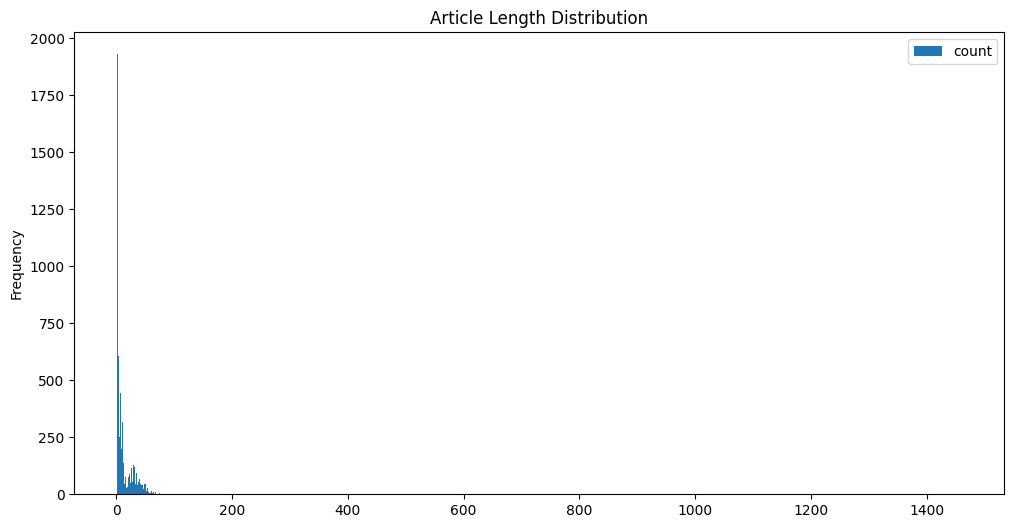

In [44]:
pd.DataFrame.from_dict(len_counter, orient='index', columns=['count']).sort_index().plot(kind='hist', figsize=(12, 6), title='Article Length Distribution', bins=1000)

In [20]:
a = 0
for k, v in data.items():
    if "20230501" <= k <= '20240430':
        a += len(data[k])
a

25460

## READ data

In [7]:
import json

meaningful_data = []
with open("llm_processed_meaningful_articles.jsonl", "r") as f:
    for line in f:
        item = json.loads(line.strip())
        meaningful_data.append(item)

rmrb_data = []
with open("rmrb_data_deduplicate.jsonl", "r") as f:
    for line in f:
        item = json.loads(line.strip())
        rmrb_data.append(item)

new_meaningful_data = []
for d in meaningful_data:
    line = int(d["identifier"].split("_")[-1])
    file_path = rmrb_data[line - 1]["file_path"]
    new_meaningful_data.append(
        {
            "identifier": file_path,
            "content": d["content"],
            "file_path": file_path,
            "model_raw_output": d["model_raw_output"],
        }
    )

with open("llm_processed_meaningful_articles_v2.jsonl", "w") as f:
    for item in new_meaningful_data:
        f.write(json.dumps(item, ensure_ascii=False) + "\n")

In [11]:
meaningful_data = []
with open("llm_processed_meaningful_articles_v2.jsonl", "r") as f:
    for line in f:
        item = json.loads(line.strip())
        meaningful_data.append(item)

In [12]:
meaningful_data[0]

{'identifier': 'rmrb_data/20220818/20220818-04-07.txt',
 'content': '国务院任免国家工作人员\n\n\u3000\u3000新华社北京8月17日电\u3000国务院任免国家工作人员。\n\u3000\u3000任命孙茂利为公安部副部长；任命王东伟为财政部副部长；任命朱程清（女）为水利部副部长；任命徐加爱为应急管理部副部长；任命潘贤掌为国务院台湾事务办公室副主任。\n\u3000\u3000免去余蔚平的财政部副部长职务；免去陆桂华的水利部副部长职务。',
 'file_path': 'rmrb_data/20220818/20220818-04-07.txt',
 'model_raw_output': '是'}

In [13]:
with open("llm_processed_meaningful_articles_v2_rag.jsonl", "w") as f:
    idx = 0
    for item in meaningful_data:
        # item["content"] = item["content"].replace("\n", " ")
        if '20230501' <= item['file_path'].split("/")[1] <= '20240430':
            item["id"] = idx
            idx += 1
            item['contents'] = item['content']
            del item['content']
            f.write(json.dumps(item, ensure_ascii=False) + "\n")

In [6]:
import json
import pandas as pd
df = pd.read_excel('25NLP_data_dev.xlsx')

# 将数据转换为tsv格式（问题|||答案）
test_json_data = []
for index, row in df.iterrows():
    question = row['Q']
    answer = row['A']
    reference = row['Reference']
    if pd.isna(answer):  # 处理NaN值
        answer = ""
    test_json_data.append(
        {
            "question": question,
            "answer": answer,
            "reference": reference
        }
    )

# 将结果写入tsv文件
with open('test_ans.json', 'w', encoding='utf-8') as f:
    json.dump(test_json_data, f, ensure_ascii=False, indent=4)

print("已成功转换并保存到test_ans.json")

已成功转换并保存到test_ans.json


In [4]:
df

,Q,A,Unnamed: 2,Reference
0,全球首个“双奥之城”是哪个城市？,北京,NaN,http://paper.people.com.cn/rmrb/html/2023-05/0...
1,中国第一大贸易伙伴是？,东盟,NaN,http://paper.people.com.cn/rmrb/html/2023-05/1...
2,《宝水》的作者是谁？,乔叶,NaN,http://paper.people.com.cn/rmrb/html/2023-05/1...
3,俄罗斯国立图书馆是什么电影的取景地？,莫斯科不相信眼泪,NaN,http://paper.people.com.cn/rmrb/html/2023-05/1...
4,摩中战略伙伴关系是哪一年建立的？,2016年,NaN,http://paper.people.com.cn/rmrb/html/2023-05/1...
5,“2023·中国西藏发展论坛”的主题是什么？,新时代、新西藏、新征程——西藏高质量发展与人权保障的新篇章,NaN,https://paper.people.com.cn/rmrb/html/2023-05/...
6,“澳门科学一号”卫星由哪所高校研制？,澳门科技大学,NaN,http://paper.people.com.cn/rmrb/html/2023-05/2...
7,G60高速公路的起点是什么？,上海松江,NaN,http://paper.people.com.cn/rmrb/html/2023-06/2...
8,河西走廊的“母亲河”是哪条河？,黑河,NaN,http://paper.people.com.cn/rmrb/html/2023-06/0...
9,第三届中非经贸博览会在哪里举行？,湖南长沙,NaN,http://paper.people.com.cn/rmrb/html/2023-06/3...


In [6]:
rmrb_data[15105]

{'date': '20220818',
 'content': '国务院任免国家工作人员\n\n\u3000\u3000新华社北京8月17日电\u3000国务院任免国家工作人员。\n\u3000\u3000任命孙茂利为公安部副部长；任命王东伟为财政部副部长；任命朱程清（女）为水利部副部长；任命徐加爱为应急管理部副部长；任命潘贤掌为国务院台湾事务办公室副主任。\n\u3000\u3000免去余蔚平的财政部副部长职务；免去陆桂华的水利部副部长职务。',
 'file_path': 'rmrb_data/20220818/20220818-04-07.txt'}

In [26]:
total_corpus = [f"{date[:4]}年{date[4:6]}月{date[6:]}日的报道为: {'\n\n'.join(text)}" for date, text in data.items()]

In [27]:
total_corpus[0]

'2024年05月11日的报道为: \n刘国中将访问乌兹别克斯坦、哈萨克斯坦、吉尔吉斯斯坦并举行中乌政府间合作委员会第七次会议\n\n\u3000\u3000新华社北京5月10日电\xa0\xa0外交部发言人林剑10日宣布：应乌兹别克斯坦总理阿里波夫、哈萨克斯坦副总理茹曼加林、吉尔吉斯斯坦总理扎帕罗夫邀请，中共中央政治局委员、国务院副总理刘国中将于5月12日至20日访问乌兹别克斯坦、哈萨克斯坦、吉尔吉斯斯坦并举行中乌政府间合作委员会第七次会议。\n\n\n赵乐际在河南调研时强调\n坚持党的领导人民当家作主依法治国有机统一  健全吸纳民意汇集民智工作机制\n\n\u3000\u3000新华社郑州5月10日电\xa0\xa0中共中央政治局常委、全国人大常委会委员长赵乐际7日至10日在河南调研。他强调，要坚持以习近平新时代中国特色社会主义思想为指导，贯彻落实党的二十大决策部署，坚持党的领导、人民当家作主、依法治国有机统一，立足人大职能职责，健全吸纳民意、汇集民智工作机制，践行和发展全过程人民民主，为推进中国式现代化凝聚力量。\n\u3000\u3000赵乐际先后到周口、许昌、郑州等地调研，深入社区、企业、科研单位、乡村和农户家中，与人大代表、群众交流。他强调，地方人大及其常委会要围绕地方党委贯彻落实党中央大政方针的决策部署，结合地方实际，依法履职、担当尽责，扎实开展立法、监督、代表等工作，更好服务本地区改革发展。在河南省代表联络总站和许昌市建安区新元街道人大代表联络站，赵乐际详细了解代表履职情况。他指出，要坚持群众路线，向人民群众学习，自觉问计于民、问需于民，有事多商量，调动各方面积极性创造性。要发挥人大代表来自人民、扎根人民的特点优势，通过多种方式听取和反映人民群众的意愿呼声，增进同人民群众的感情。代表听取群众意见、联系服务群众，要在党组织领导下，与基层治理、基层建设结合起来、融入其中。\n\u3000\u3000赵乐际来到省人大常委会机关调研，看望机关干部，并主持召开座谈会。他强调，全过程人民民主是社会主义民主政治的本质属性，人民代表大会制度是实现我国全过程人民民主的重要制度载体。人大工作要充分吸纳民意、汇集民智，深入践行和发展全过程人民民主。要坚持党的领导，充分发挥党总揽全局、协调各方的领导核心作用，保证实现党的主张和人民意志的高度统一，保证党领导人民依法有效治理国

In [1]:
sum([len(data[k]) for k in data.keys()])

NameError: name 'data' is not defined

In [2]:
a

NameError: name 'a' is not defined

In [18]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("/media/public/models/huggingface/Qwen/Qwen2.5-7B-Instruct/")

/home/xiachunxuan/nlp-homework/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [29]:
a = tokenizer.tokenize('\n\n'.join(total_corpus))

Token indices sequence length is longer than the specified maximum sequence length for this model (68247514 > 131072). Running this sequence through the model will result in indexing errors


['2',
 '0',
 '2',
 '4',
 'å¹´',
 '0',
 '5',
 'æľĪ',
 '1',
 '1',
 'æĹ¥',
 'çļĦ',
 'æĬ¥éģĵ',
 'ä¸º',
 ':',
 'ĠĊ',
 'åĪĺ',
 'åĽ½',
 'ä¸Ń',
 'å°Ĩ',
 'è®¿éĹ®',
 'ä¹Į',
 'åħ¹',
 'åĪ«',
 'åħĭ',
 'æĸ¯åĿ¦',
 'ãĢģ',
 'åĵĪ',
 'èĲ¨',
 'åħĭ',
 'æĸ¯åĿ¦',
 'ãĢģ',
 'åĲī',
 'å°Ķ',
 'åĲī',
 'æĸ¯',
 'æĸ¯åĿ¦',
 'å¹¶',
 'ä¸¾è¡Į',
 'ä¸Ń',
 'ä¹Į',
 'æĶ¿åºľ',
 'éĹ´',
 'åĲĪä½ľ',
 'å§Ķåĳĺä¼ļ',
 'ç¬¬ä¸ĥ',
 'æ¬¡ä¼ļè®®',
 'ĊĊ',
 'ãĢĢ',
 'ãĢĢ',
 'æĸ°åįİç¤¾',
 'åĮĹäº¬',
 '5',
 'æľĪ',
 '1',
 '0',
 'æĹ¥çĶµ',
 'Âł',
 'Âł',
 'å¤ĸäº¤éĥ¨',
 'åıĳè¨Ģäºº',
 'æŀĹ',
 'åīĳ',
 '1',
 '0',
 'æĹ¥',
 'å®£å¸ĥ',
 'ï¼ļ',
 'åºĶ',
 'ä¹Į',
 'åħ¹',
 'åĪ«',
 'åħĭ',
 'æĸ¯åĿ¦',
 'æĢ»çĲĨ',
 'éĺ¿éĩĮ',
 'æ³¢',
 'å¤«',
 'ãĢģ',
 'åĵĪ',
 'èĲ¨',
 'åħĭ',
 'æĸ¯åĿ¦',
 'åī¯æĢ»',
 'çĲĨ',
 'èĮ¹',
 'æĽ¼',
 'åĬł',
 'æŀĹ',
 'ãĢģ',
 'åĲī',
 'å°Ķ',
 'åĲī',
 'æĸ¯',
 'æĸ¯åĿ¦',
 'æĢ»çĲĨ',
 'æīİ',
 'å¸ķ',
 'ç½Ĺ',
 'å¤«',
 'éĤĢè¯·',
 'ï¼Į',
 'ä¸Ńåħ±ä¸Ńå¤®',
 'æĶ¿æ²»',
 'å±Ģ',
 'å§Ķåĳĺ',
 'ãĢģ',
 'åĽ½åĬ¡éĻ¢',
 'åī¯æĢ»',
 'çĲĨ',
 'åĪĺ',
 'åĽ½',
 'ä¸Ń',
 'å°Ĩäºİ',
 '5

## model

In [2]:
# import os
# os.environ["HF_HOME"] = "/media/public/models/huggingface"
from transformers import AutoTokenizer, AutoModelForCausalLM
model_name = "/media/public/models/huggingface/qwen/Qwen2.5-0.5B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="cuda:0", torch_dtype="auto", trust_remote_code=True)

In [5]:
import torch
instruction = "以下这篇文章是否有意义？如果是，则只输出是，如果否，则只输出否"
article = ""

# 使用chat_template构建输入
messages = [
    {"role": "user", "content": f"## Instruction\n{instruction}\n\n## Article\n{article}"}
]

# 使用chat_template格式化输入
input_text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
inputs = tokenizer.encode(input_text, return_tensors="pt").to(model.device)

# 生成回复
with torch.no_grad():
    outputs = model.generate(
        inputs,
        max_length=inputs.shape[1] + 50,
        num_return_sequences=1,
        temperature=0.7,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id,
        max_generation_length=10,
    )

# 解码并打印回复
full_response = tokenizer.decode(outputs[0], skip_special_tokens=True)

# 提取模型生成的部分（去除原始输入）
# 注意：这里的切分方式可能需要根据具体模型的chat_template格式进行调整
# generated_text = full_response[len(input_text.split("<|assistant|>")[0]) + len("<|assistant|>"):].strip()
# print("生成的回复:", generated_text)
full_response.split("assistant\n")[-1].strip()

ValueError: The following `model_kwargs` are not used by the model: ['max_generation_length'] (note: typos in the generate arguments will also show up in this list)

"A. How are you?\nB. I'm fine, thank you.\nC. Nice to meet you.\nD. What's up?\nAnswer:\nB\n\nWhen a train is running in reverse on an electrified railway line, what should be"

In [46]:
from openai import OpenAI

client = OpenAI(
    base_url="http://localhost:8000/v1",
    api_key="token-abc123",
)

instruction = "以下这段文字能否作为一篇有意义的文章或者报道？如果是，则只输出是，如果否，则只输出否。"
articles = [
    "本版责编：王  观\n\n\u3000\u3000版式设计：张芳曼",
    "汇聚全球优质资源  推动奶业可持续发展\n伊利连续两届参加中国国际供应链促进博览会",
    "让世界共享“普洱味道”",
    "成都第31届世界大学生夏季运动会倒计时15天",
    "博物馆，融入社会发展\n\n\u3000\u3000版式设计：张芳曼",
    "图片报道\n\n\u3000\u3000日前，在迎峰度夏关键时期，为保障电力供应，国网安徽电力组织人员对线路进行维护，提升保供能力。图为电力工人在合肥长丰县陶楼镇开展检修作业。\n\u3000\u3000刘\xa0\xa0兵摄（人民视觉）",
    "李强将出席二十国集团领导人视频峰会\n\n\u3000\u3000新华社北京11月21日电\xa0\xa0外交部发言人毛宁21日宣布：应印度共和国政府邀请，国务院总理李强将于11月22日出席二十国集团领导人视频峰会。",
    "图片报道\n\n\u3000\u3000今年1至11月，江西省赣州国际陆港累计开行中欧（亚）班列128列，铁路集装箱吞吐量24.8万标箱。图为赣州国际陆港货运场站一派繁忙景象。\n\u3000\u3000李\xa0\xa0劼摄（影像中国）",
    "马尔代夫外长扎米尔将访华\n\n\u3000\u3000新华社北京7月19日电\xa0\xa0外交部发言人林剑19日宣布：应中共中央政治局委员、外交部长王毅邀请，马尔代夫外交部长扎米尔将于7月20日至24日来华访问。",
]

for a in articles:
    print(a)
    completion = client.chat.completions.create(
        model="/media/public/models/huggingface/qwen/Qwen2.5-7B-Instruct",
        messages=[
            {
                "role": "user",
                "content": f"## Instruction\n{instruction}\n\n## Article\n{a}",
            }
        ],
        temperature=0,
    )
    print(completion.choices[0].message.content.strip())
    print("=" * 50)
# completion = client.chat.completions.create(
#     model="/media/public/models/huggingface/qwen/Qwen2.5-0.5B-Instruct",
#     messages=[
#         {
#             "role": "user",
#             "content": f"## Instruction\n{instruction}\n\n## Article\n{article}",
#         }
#     ],
#     temperature=0,
# )
# print(completion.choices[0].message)

本版责编：王  观

　　版式设计：张芳曼
否
汇聚全球优质资源  推动奶业可持续发展
伊利连续两届参加中国国际供应链促进博览会
否
让世界共享“普洱味道”
否
成都第31届世界大学生夏季运动会倒计时15天
否
博物馆，融入社会发展

　　版式设计：张芳曼
否
图片报道

　　日前，在迎峰度夏关键时期，为保障电力供应，国网安徽电力组织人员对线路进行维护，提升保供能力。图为电力工人在合肥长丰县陶楼镇开展检修作业。
　　刘  兵摄（人民视觉）
否
李强将出席二十国集团领导人视频峰会

　　新华社北京11月21日电  外交部发言人毛宁21日宣布：应印度共和国政府邀请，国务院总理李强将于11月22日出席二十国集团领导人视频峰会。
是
图片报道

　　今年1至11月，江西省赣州国际陆港累计开行中欧（亚）班列128列，铁路集装箱吞吐量24.8万标箱。图为赣州国际陆港货运场站一派繁忙景象。
　　李  劼摄（影像中国）
否
马尔代夫外长扎米尔将访华

　　新华社北京7月19日电  外交部发言人林剑19日宣布：应中共中央政治局委员、外交部长王毅邀请，马尔代夫外交部长扎米尔将于7月20日至24日来华访问。
是
